In [1]:
import pyart
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import geopy
from geopy import distance
import cinrad
import xradar as xd

import products
import sort_radar
import cartopy.crs as ccrs
from datetime import datetime, timedelta
from time import process_time
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.io.shapereader as shpreader


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
reader = shpreader.Reader('SC_municipios_2021.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

In [8]:
#dia 20210214 18:35 n tem dado#
#dia 20220623 19:15 n tem dado#
#dia 20211211 22:00 -48.4321 -27.5765#
#dia 20210919 18:25 -50.3127 -27.8062#
#dia 20221108 19:15 -48.9139 -27.0766#
#dia 20220621 20:50 n tem dado#
#dia 20220621 13:25 -48.6892 -27.6562

dia = '20221108'
hora ='19'
min = '10'
radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}{hora}{min}.hdf5')

site_lon = -48.9139  
site_lat = -27.0766 

rad_lat = radar.latitude["data"][0]
rad_lon = radar.longitude["data"][0]

In [6]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)

display.plot_ppi_map(
    "corrected_reflectivity",
    1,
    ax=ax,
    vmin=0,
    vmax=70,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    mask_outside=True,
)
ax.set_extent([site_lon - 0.5, site_lon + 0.5, site_lat - 0.5, site_lat + 0.5])
# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black",s  = 2)
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefletividade.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'corrected_velocity',
    1,
    vmin=-45,
    vmax=45,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap = 'pyart_NWSVel'
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.scatter(site_lon, site_lat, color="black",s  = 2)
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomvelocidade.png', bbox_inches='tight',dpi = 500)
plt.close()

In [19]:
#farm de plot automatico(funciona!, mas sem zoom)#
g = 0
d = 0 
c = int(hora) - 1 
min = int(min)
while g< 12:
    if min >=60:
        c = c+1
        min= min-60
    if 10>c and min>=10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}0{c}{min}.hdf5')
        min  = min +10
    if 10> c and min <10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}0{c}0{min}.hdf5')
        min= min+10
    if c>=10 and min<10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}{c}0{min}.hdf5')
        min= min+10
    if c>=10 and min >= 10 :
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}{c}{min}.hdf5')
        min = min +10
    d = d+1
    # Setup the RadarMapDisplay and add our projection
    display = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        "corrected_reflectivity",
        2,
        ax=ax,
        vmin=0,
        vmax=70,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        mask_outside=True,
    )

    # Plot our site location on top of the radar image
    ax.set_extent([site_lon - 0.5, site_lon + 0.5, site_lat - 0.5, site_lat + 0.5])
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refletividade{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()

    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        'corrected_velocity',
        1,
        vmin=-45,
        vmax=45,
        ax = ax,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        cmap = 'pyart_NWSVel'
    )
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\velocidade{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()
    g =g +1

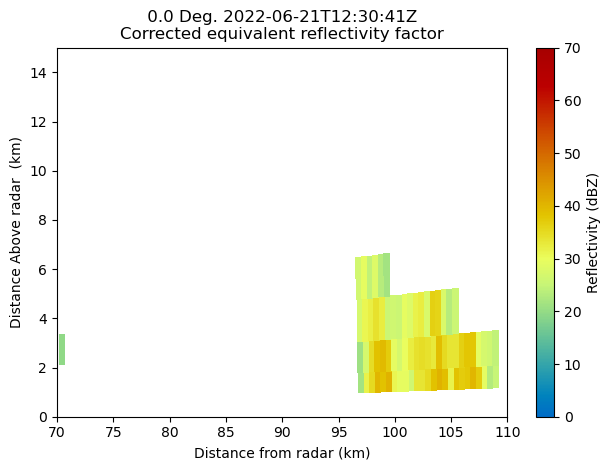

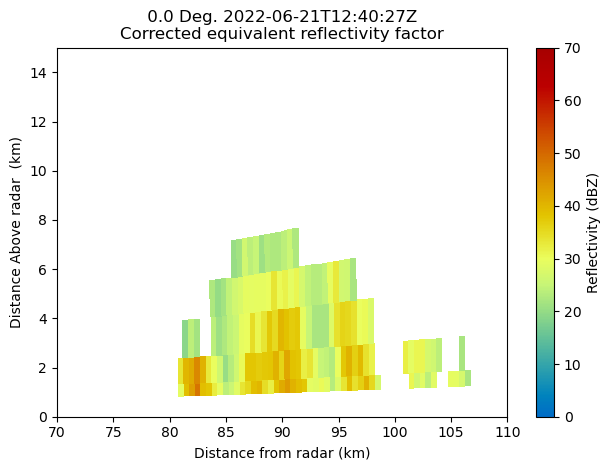

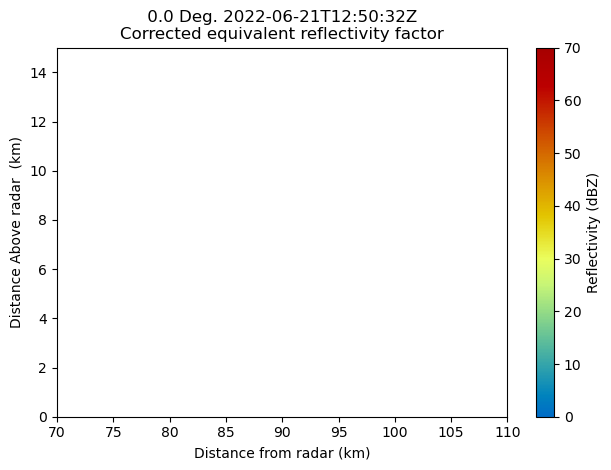

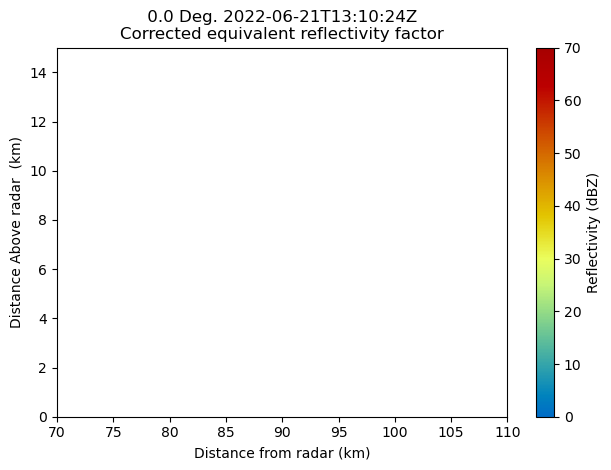

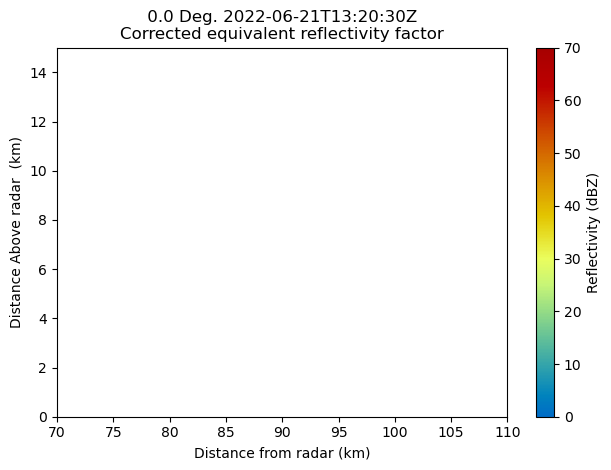

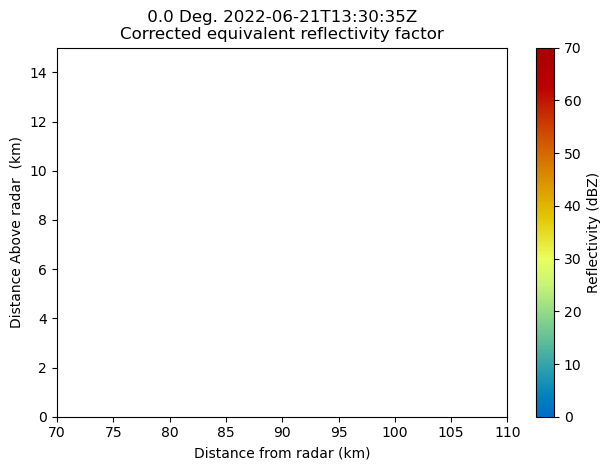

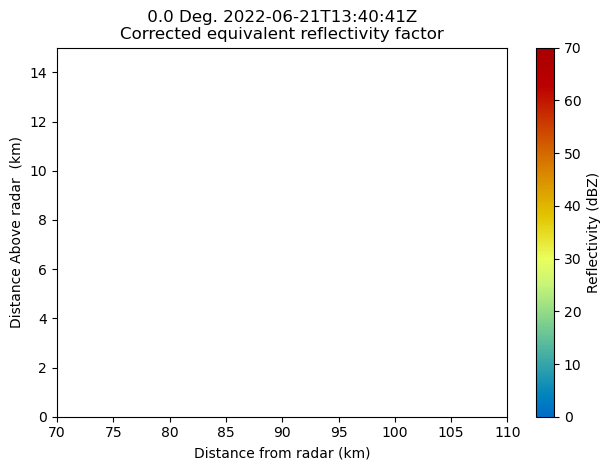

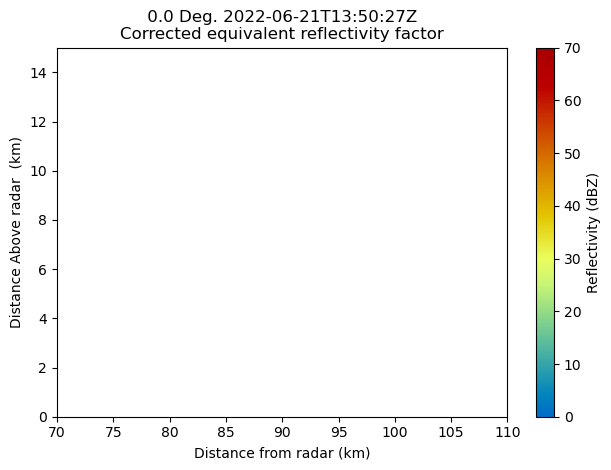

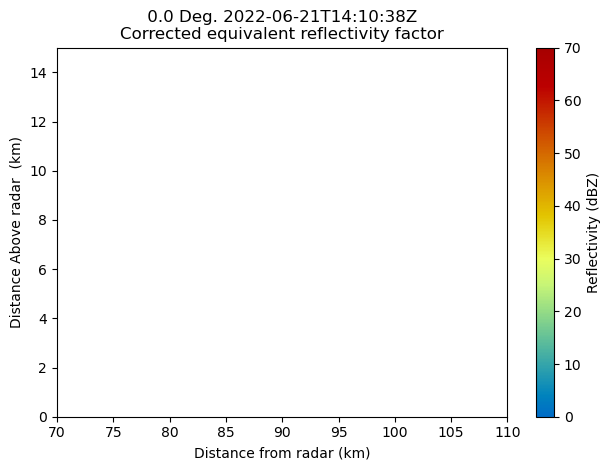

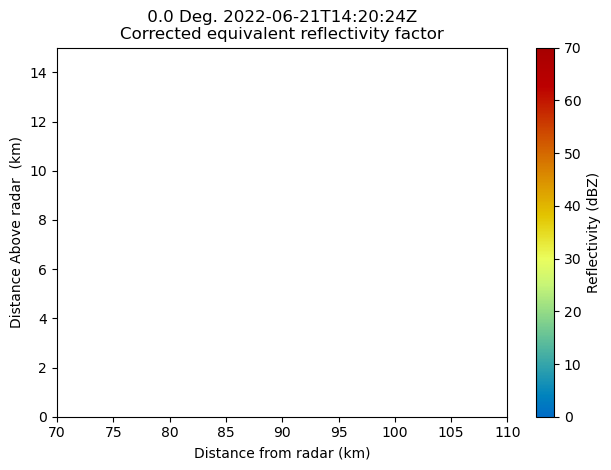

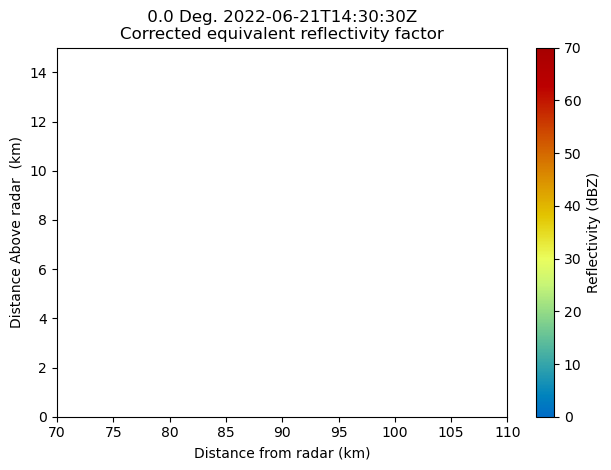

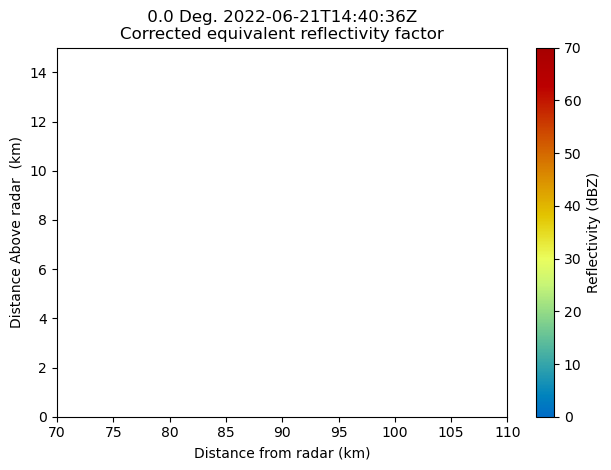

In [5]:
#cortes TRANSversais loop#
g = 0
d = 0 
c = int(hora) - 1 
min = int(min)
while g< 12:
    if min >=60:
        c = c+1
        min= min-60
    if 10>c and min>=10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}0{c}{min}.hdf5')
        min  = min +10
    if 10> c and min <10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}0{c}0{min}.hdf5')
        min= min+10
    if c>=10 and min<10:
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}{c}0{min}.hdf5')
        min= min+10
    if c>=10 and min >= 10 :
        radar = pyart.aux_io.read_gamic(f'dados2/morroigreja/R13547478_{dia}{c}{min}.hdf5')
        min = min +10
    d = d+1
    xsect = pyart.util.cross_section_ppi(radar, [55,56])
    colorbar_label2 = "Reflectivity (dBZ)"
    display = pyart.graph.RadarDisplay(xsect)
    fig = plt.figure()
    display.plot(
        'corrected_reflectivity', 0, vmin=0, vmax=70, colorbar_label=colorbar_label2
    )
    plt.ylim(0, 15)
    plt.xlim(70,110)
    plt.tight_layout()
    plt.show()
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\comparacao{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()
    g =g +1

In [9]:
#gerador de media dos pontos proximos ao local do evento#
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
ds2 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon+0.005)
ds3 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon-0.005)
ds4 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon+0.005)
ds5 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon-0.005)
ds6 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon)
ds7 = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon+0.005)
ds8 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon)
ds9 = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon-0.005)

refle = (ds.corrected_reflectivity[:].values+ ds2.corrected_reflectivity[:].values+ds3.corrected_reflectivity[:].values+ds4.corrected_reflectivity[:].values+ds5.corrected_reflectivity[:].values+ds6.corrected_reflectivity[:].values+ds7.corrected_reflectivity[:].values+ds8.corrected_reflectivity[:].values+ds9.corrected_reflectivity[:].values)/9


dsm = xr.Dataset(
    data_vars=dict(
        corrected_reflectivity=(["Altura"],refle),
    ),
    coords=dict(
        Altura = ds.height[:].values
    )
)

C:\Users\victo\miniconda3\lib\site-packages\pyart\util\columnsect.py:389: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  da_base = xr.DataArray(base_time, name="base_time")
C:\Users\victo\miniconda3\lib\site-packages\pyart\util\columnsect.py:389: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArra

In [10]:
ds

<xarray.Dataset>
Dimensions:                 (height: 15)
Coordinates:
  * height                  (height) float64 3.889e+03 4.977e+03 ... 4.477e+04
Data variables:
    corrected_reflectivity  (height) float64 55.5 58.0 57.0 46.0 ... nan nan nan
    reflectivity            (height) float64 55.5 58.5 57.5 46.5 ... nan nan nan
    corrected_velocity      (height) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    spectrum_width          (height) float64 0.0 0.0 0.0 0.0 ... nan nan nan nan
    base_time               datetime64[ns] 2022-11-08T19:10:24.050000
    time_offset             (height) datetime64[ns] 2022-11-08T19:10:36.90600...
Attributes:
    distance_from_radar:    129.249 km
    azimuth:                25.3 degrees
    latitude_of_location:   -27.0766 degrees
    longitude_of_location:  -48.9139 degrees

In [11]:
fig = plt.figure()
dsm.corrected_reflectivity.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refletividade.png', bbox_inches='tight',dpi = 500)
plt.close()

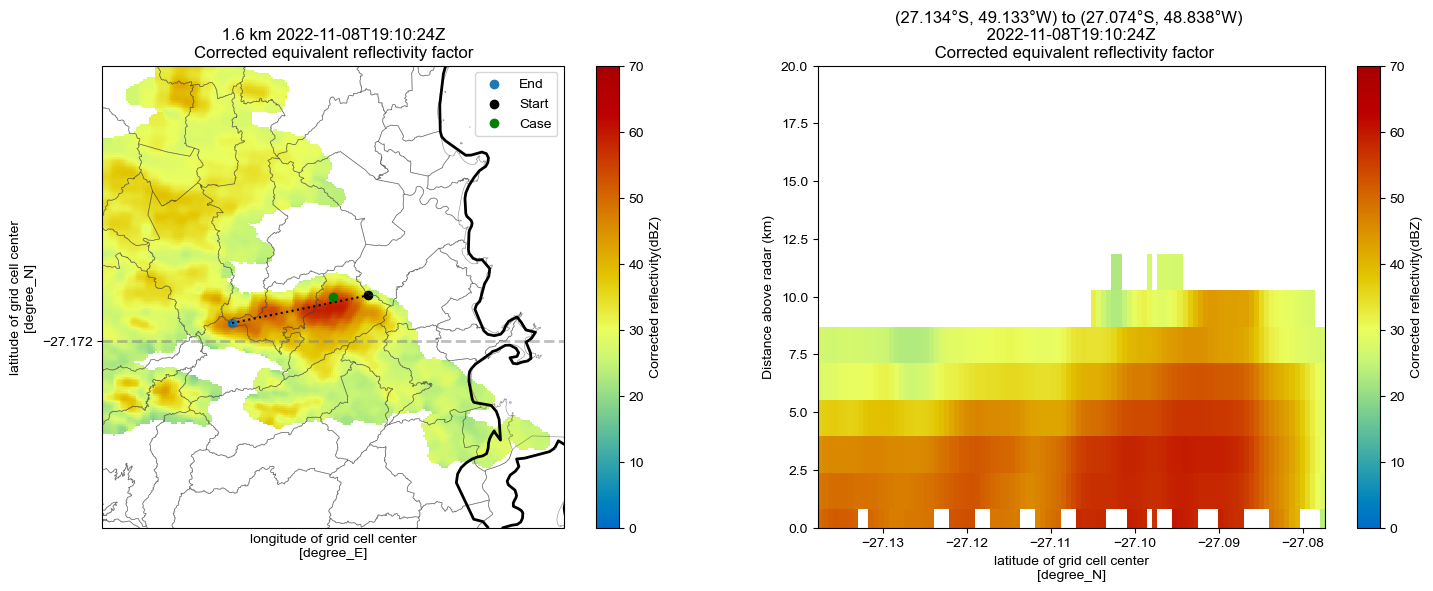

In [18]:
start = (-27.134 , -49.133)
end = (-27.074 , -48.838)
caso = (site_lat, site_lon)

site_lon = -48.9139  
site_lat = -27.0766 

grid = pyart.map.grid_from_radars(radar,
    grid_shape=(20, 960, 960),
    grid_limits=((0, 30000), (-200000, 200000), (-200000, 200000)),
    fields=["corrected_reflectivity"],
)
# Setup the figure, and plot our x/y view of the radar
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid(
    "corrected_reflectivity",
    1,
    ax=ax1,
    cmap="pyart_HomeyerRainbow",
    vmin=0,
    vmax=70,
)

# Plot our start and end points, as well as a line in between the two
ax1.scatter(start[1], start[0], color="tab:blue", label="End")
ax1.scatter(end[1], end[0], color="black", label="Start")
ax1.scatter(caso[1],caso[0], color="green", label="Case" )
ax1.plot([start[1], end[1]], [start[0], end[0]], color="k", linestyle=":")
plt.legend(loc="upper right")

# Add a cross section, using our start and end points, and set our x-axis as latitude (lat)
ax2 = plt.subplot(122)
ax2.set_ylim(0, 15)
display.plot_cross_section(
    "corrected_reflectivity",
    start,
    end,
    x_axis="lat",
    cmap="pyart_HomeyerRainbow",
    vmin=0,
    vmax=70,
)
ax2.set_ylim(0, 20)
ax1.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\cortedatempestade.png', bbox_inches='tight',dpi = 500)

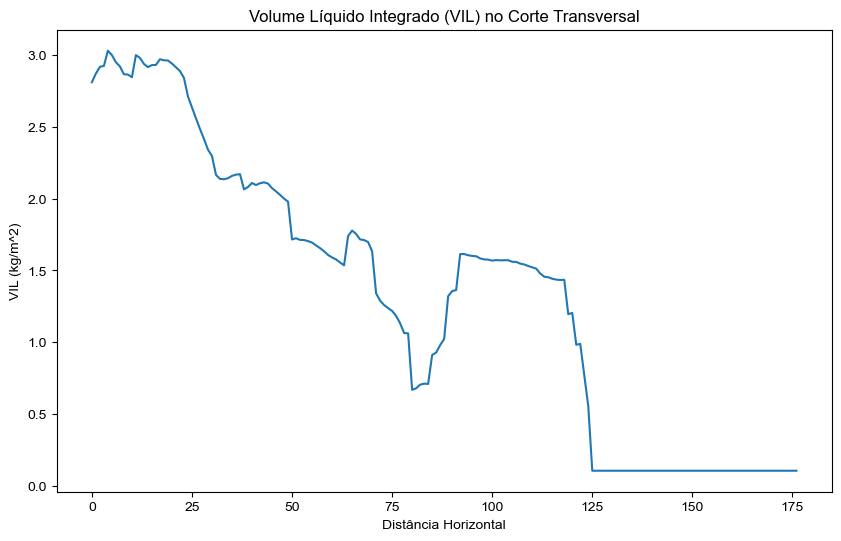

In [16]:
vil = calculate_vil(cross_section, altitudes)
fig = plt.figure(figsize=(10, 6))

plt.plot(vil)
plt.xlabel('Distância Horizontal')
plt.ylabel('VIL (kg/m^2)')
plt.title('Volume Líquido Integrado (VIL) no Corte Transversal')
plt.show()
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\vildocorte.png', bbox_inches='tight',dpi = 500)

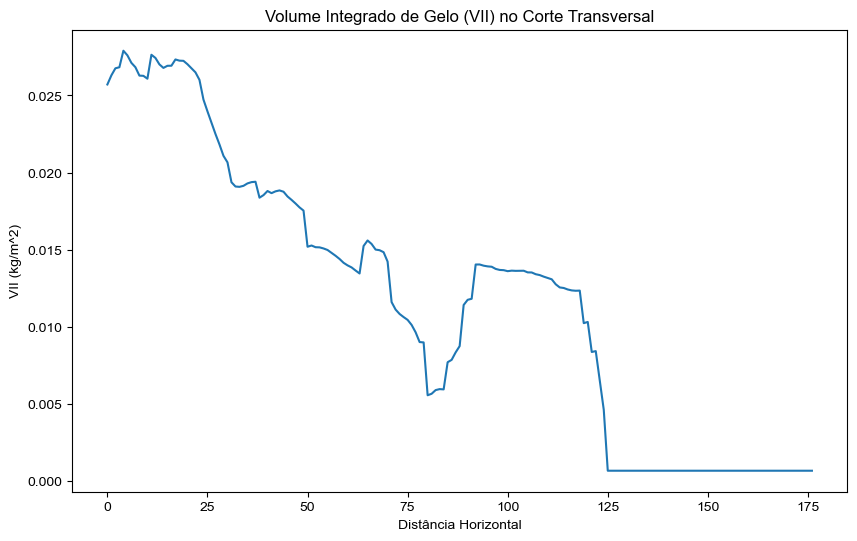

In [17]:

vii = calculate_vii(cross_section, altitudes)

fig = plt.figure(figsize=(10, 6))
plt.plot(vii)
plt.xlabel('Distância Horizontal')
plt.ylabel('VII (kg/m^2)')
plt.title('Volume Integrado de Gelo (VII) no Corte Transversal')
plt.show()
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\viidocorte.png', bbox_inches='tight',dpi = 500)

In [22]:
rain = pyart.retrieve.ZtoR(radar)

In [23]:
rain = vil(radar)
display = pyart.graph.RadarMapDisplay(rain)
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)

display.plot_ppi_map(
    "NWS_primary_prate",
    1,
    ax=ax,
    vmin=0,
    vmax=100,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    mask_outside=True,
)
#ax.set_extent([site_lon - 0.5, site_lon + 0.5, site_lat - 0.5, site_lat + 0.5])
# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black",s  = 2)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefletividade.png', bbox_inches='tight',dpi = 500)


NameError: name 'get_metadata' is not defined